<a href="https://colab.research.google.com/github/NilienaCelineBiju/SURGE-2023/blob/main/Working_with_Task_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mrugsen_Perceptual Task_2022-06-30_15h54.21.964.csv to Mrugsen_Perceptual Task_2022-06-30_15h54.21.964.csv


In [ ]:
import numpy as np
import pandas as pd

import io
df2 = pd.read_csv(io.BytesIO(uploaded['Mrugsen_Perceptual Task_2022-06-30_15h54.21.964.csv']))

response = df2['accuracy'].to_numpy()
response

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
!pip install pyhgf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.7 MB/s eta 0:00:00


In [ ]:
import jax.numpy as jnp
from pyhgf.model import HGF
from pyhgf import load_data
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
timeserie = response

In [ ]:
# plotting for illusion magnitude

Creating a binary Hierarchical Gaussian Filter with 2 levels.
Add 240 new binary observations.


array([<Axes: ylabel='$\\mu_2$'>, <Axes: ylabel='$\\mu_1$'>, <Axes: >],
      dtype=object)

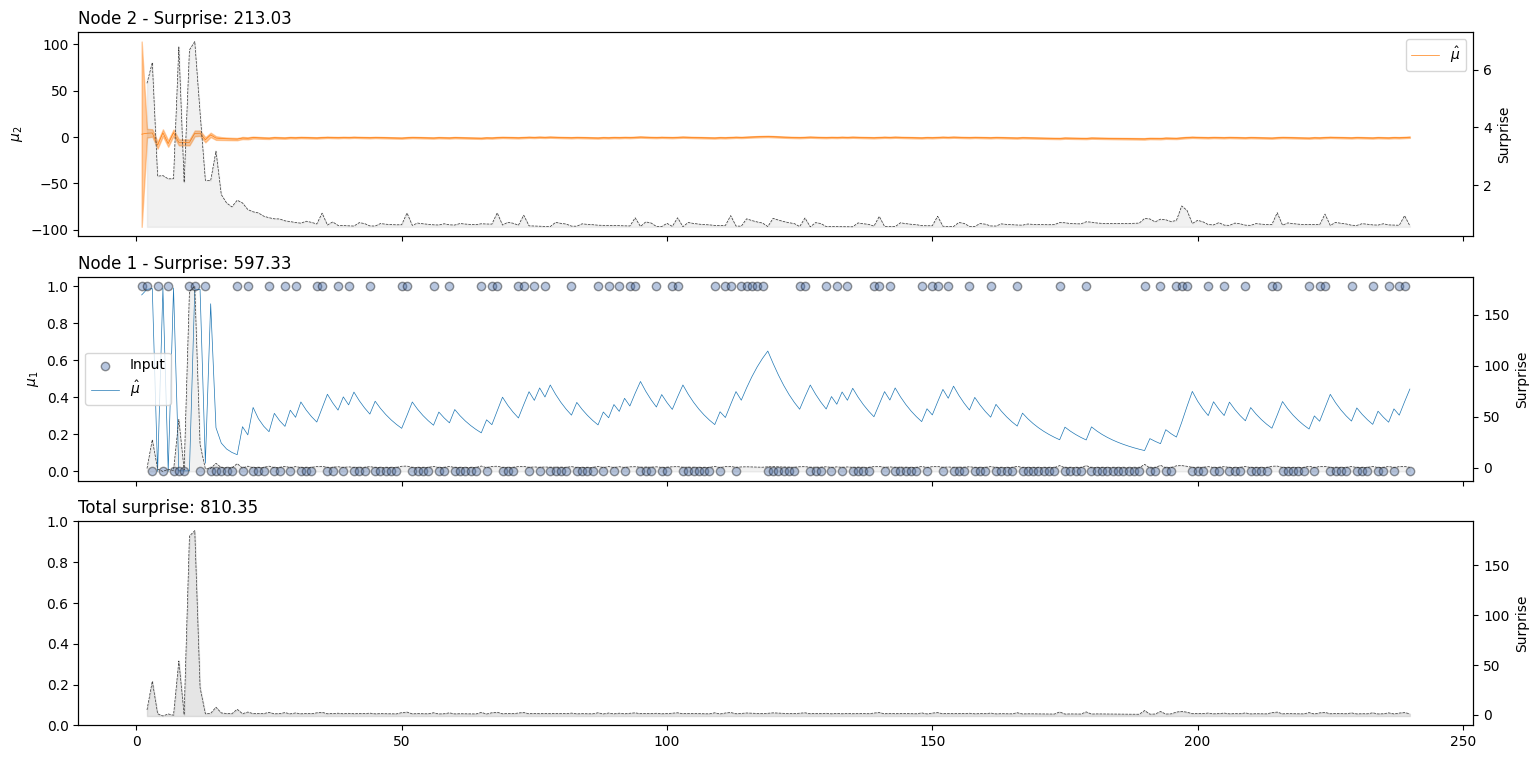

In [ ]:
two_levels_hgf = HGF(
    n_levels=2,
    model_type="binary",
    initial_mu={"1": 0.0, "2": 3},
    # mu_1 value - 0,1,0.5 all of these values not really cahnges value of surprise : mu_2 value - 3 coz its the avg of the illusion_magnitude value
    # mu_2 = 1, 330 = total surprise
    # mu_2 = 2, 334
    # mu_2 = 3, 344
    # mu_2 = 4, 370
    # mu_2 = 5, 441
    initial_pi={"1": 0.0, "2": 1e-4},
    omega={"2": -3.0},
)

two_levels_hgf = two_levels_hgf.input_data(input_data=timeserie)

two_levels_hgf.plot_trajectories()

Creating a binary Hierarchical Gaussian Filter with 2 levels.
Add 240 new binary observations.


array([<Axes: ylabel='$\\mu_2$'>, <Axes: ylabel='$\\mu_1$'>, <Axes: >],
      dtype=object)

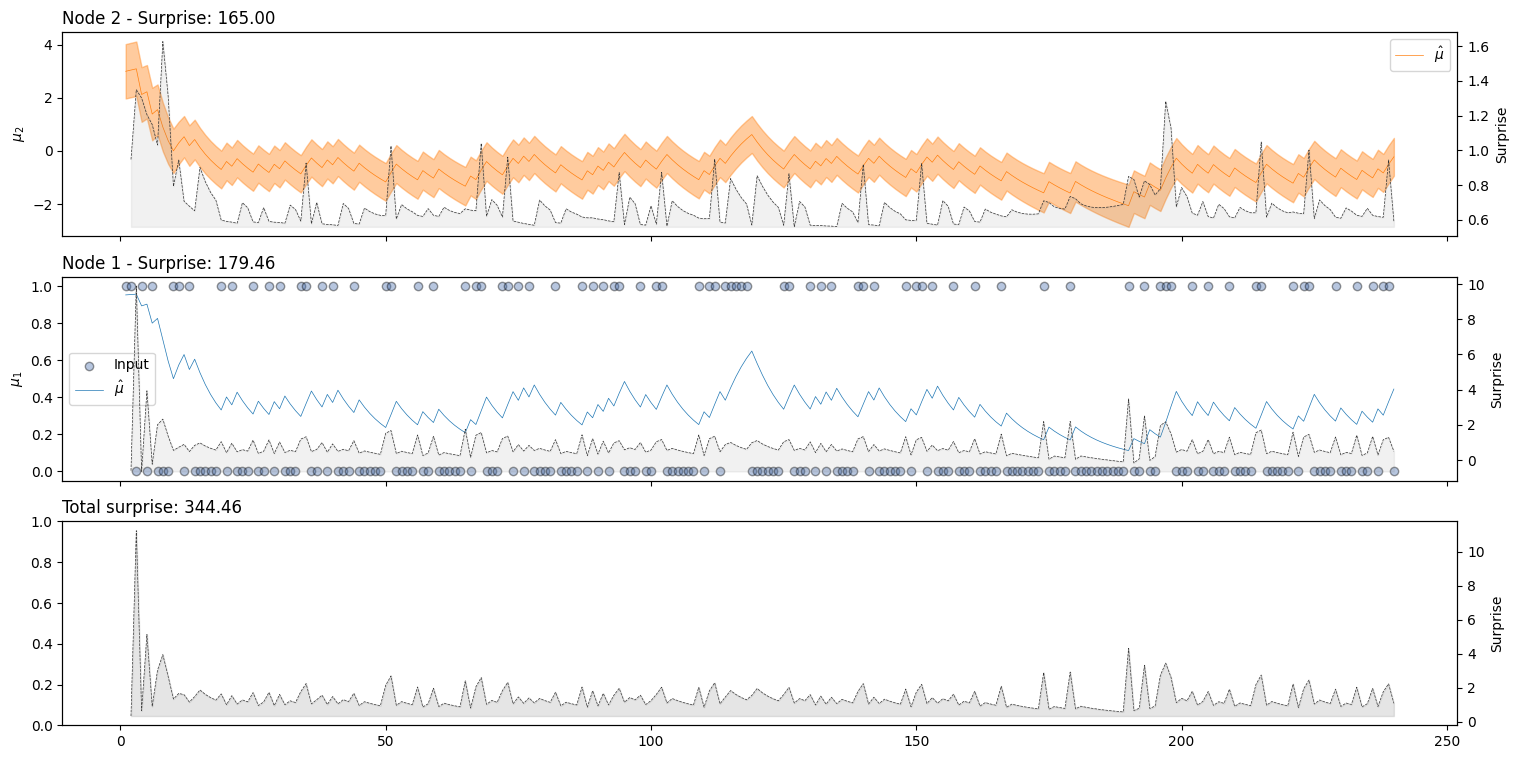

In [ ]:
two_levels_hgf = HGF(
    n_levels=2,
    model_type="binary",
    initial_mu={"1": 0.0, "2": 3},
    initial_pi={"1": 0.0, "2": 1e0},
    kappas ={"1": 0.0,"2":1.0},
    # pi_2 value chosen such that we have minimum total surprise
    omega={"2": -3.0},
)

two_levels_hgf = two_levels_hgf.input_data(input_data=timeserie)

two_levels_hgf.plot_trajectories()

In [ ]:
two_levels_hgf.parameters_structure

{0: {'pihat': inf,
  'eta0': 0.0,
  'eta1': 1.0,
  'surprise': nan,
  'time_step': nan,
  'value': nan,
  'psis': (1.0,)},
 1: {'mu': 0.0,
  'muhat': nan,
  'pi': 0.0,
  'pihat': nan,
  'kappas': None,
  'nu': nan,
  'psis': (1.0,),
  'omega': nan,
  'rho': nan},
 2: {'mu': 3,
  'muhat': nan,
  'pi': 1.0,
  'pihat': nan,
  'kappas': None,
  'nu': nan,
  'psis': None,
  'omega': -3.0,
  'rho': 0.0}}

In [ ]:
two_levels_hgf.node_structure

(Indexes(value_parents=(1,), volatility_parents=None),
 Indexes(value_parents=(2,), volatility_parents=None),
 Indexes(value_parents=None, volatility_parents=None))

In [ ]:
import pymc as pm
import arviz as az
from pyhgf.distribution import HGFDistribution
from pyhgf.response import first_level_binary_surprise

In [ ]:
hgf_logp_op = HGFDistribution(
    n_levels=2,
    model_type="binary",
    input_data=[timeserie],
    response_function=first_level_binary_surprise,
)

In [ ]:
with pm.Model() as two_levels_binary_hgf:

    kappa_1 = pm.Normal("kappa_1", -1.0 , 0.5 )
    mu_2 = pm.Uniform("mu_2", 5.0, 1.0)

    pm.Potential(
        "hgf_loglike",
        hgf_logp_op(
            omega_1=jnp.inf,
            omega_2=-3.0,
            omega_input=jnp.inf,
            rho_1=0.0,
            rho_2=0.0,
            pi_1=0.0,
            pi_2=0.0,
            mu_1=jnp.inf,
            mu_2=-3.0,
            kappa_1=kappa_1,
            omega_3=jnp.nan,
            rho_3=jnp.nan,
            pi_3=jnp.nan,
            mu_3=jnp.nan,
            kappa_2=jnp.nan
        ),
    )

    with two_levels_binary_hgf:
      two_level_hgf_idata = pm.sample(chains=1)

    az.plot_trace(two_level_hgf_idata, var_names=["kappa_1"]);
    plt.tight_layout()

SamplingError: ignored

Code is breaking for all of the values that have been input so far

In [ ]:
type(kappa_1)

pytensor.tensor.var.TensorVariable

In [ ]:
# Model comparision - RegscorePy

In [ ]:
!pip install RegscorePy

In [ ]:
from RegscorePy import *
import numpy as np
y = np.array([1,2,3,4])
y_pred = np.array([5,6,7,8])
p = 3

bic.bic(y, y_pred, p)

AttributeError: ignored

python version issue

In [ ]:
!python --version

Python 3.10.12
